In [1]:
#Titanic Kaggle

In [2]:
import pandas as pd
datos = pd.read_csv("train.csv")

In [3]:
datos.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
datos.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<Axes: xlabel='Survived', ylabel='count'>

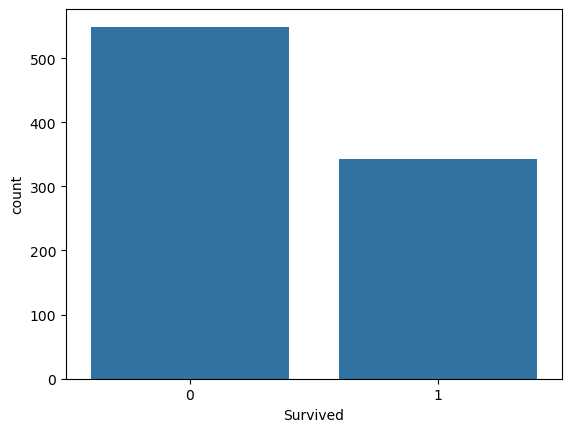

In [5]:
import seaborn as sb
sb.countplot(x="Survived", data=datos)

<Axes: xlabel='Survived', ylabel='count'>

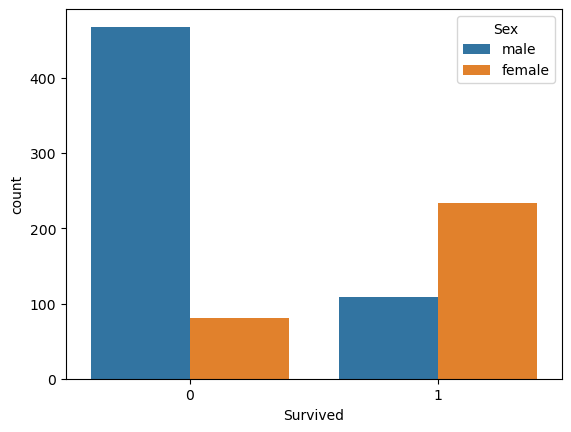

In [6]:
sb.countplot(x="Survived", data=datos, hue="Sex")

In [7]:
datos.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

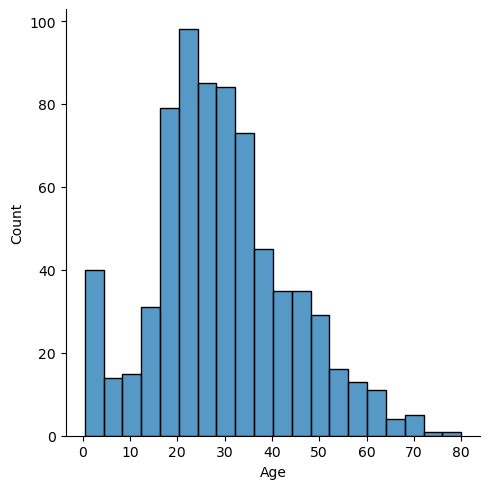

In [8]:
sb.displot(x="Age", data=datos)

In [9]:
datos["Age"]

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [10]:
datos["Age"].mean()

29.69911764705882

In [11]:
datos["Age"].fillna(datos["Age"].mean())

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64

In [12]:
datos["Age"] = datos["Age"].fillna(datos["Age"].mean())

In [13]:
datos["Age"]

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64

In [14]:
datos.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [15]:
datos = datos.drop(["Cabin"], axis=1)

In [16]:
datos["Embarked"].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [17]:
datos = datos.dropna()

In [18]:
datos.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [19]:
datos = datos.drop(["Name", "PassengerId", "Ticket"], axis=1)

In [20]:
dummies_sex = pd.get_dummies(datos["Sex"], drop_first=True)

In [21]:
datos = datos.join(dummies_sex)
datos = datos.drop(["Sex"], axis=1)

<Axes: xlabel='Survived', ylabel='count'>

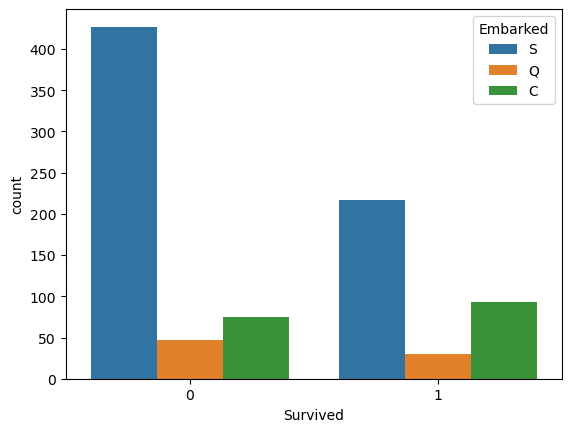

In [22]:
sb.countplot(x="Survived", data=datos, hue="Embarked")

In [23]:
dummies_embarked = pd.get_dummies(datos["Embarked"], drop_first=True)

In [24]:
datos = datos.join(dummies_embarked)
datos = datos.drop(["Embarked"], axis=1)

<Axes: >

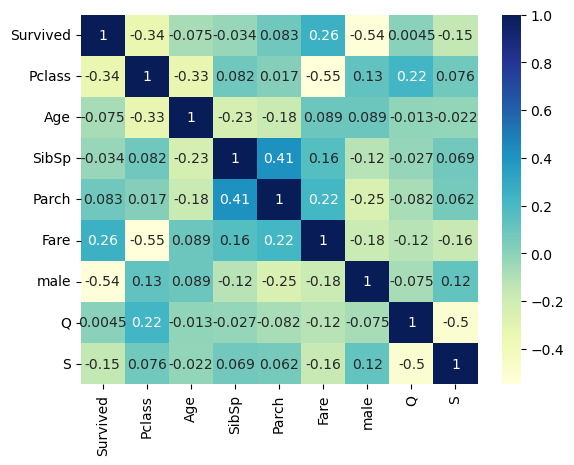

In [25]:
sb.heatmap(datos.corr(), annot=True, cmap="YlGnBu")

<Axes: xlabel='Survived', ylabel='count'>

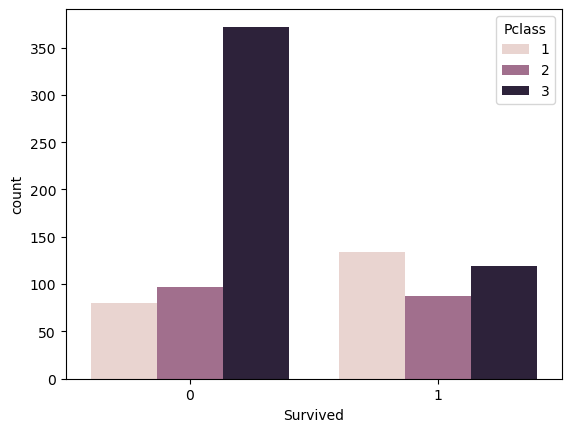

In [26]:
sb.countplot(x="Survived", data=datos, hue="Pclass")

In [27]:
X = datos.drop(["Survived"], axis=1)
y = datos["Survived"]

In [28]:
from sklearn.model_selection import train_test_split

X_ent, X_pru, y_ent, y_pru = train_test_split(X, y, test_size=.2)

In [29]:
from sklearn.tree import DecisionTreeClassifier

modelo = DecisionTreeClassifier(max_depth=10)
modelo.fit(X_ent, y_ent)
predicciones = modelo.predict(X_pru)

In [30]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pru, predicciones)

0.8314606741573034

In [31]:
from sklearn.tree import DecisionTreeClassifier

resultados = []
for i in range(1,15):
  modelo = DecisionTreeClassifier(max_depth=i)
  modelo.fit(X_ent, y_ent)
  predicciones = modelo.predict(X_pru)
  exactitud = accuracy_score(y_pru, predicciones)
  print(f"Resultado para {i}: {exactitud}")
  resultados.append(exactitud)

Resultado para 1: 0.8370786516853933
Resultado para 2: 0.8258426966292135
Resultado para 3: 0.8426966292134831
Resultado para 4: 0.8539325842696629
Resultado para 5: 0.8539325842696629
Resultado para 6: 0.8370786516853933
Resultado para 7: 0.8370786516853933
Resultado para 8: 0.8426966292134831
Resultado para 9: 0.848314606741573
Resultado para 10: 0.8314606741573034
Resultado para 11: 0.8370786516853933
Resultado para 12: 0.8314606741573034
Resultado para 13: 0.8370786516853933
Resultado para 14: 0.8202247191011236


<Axes: >

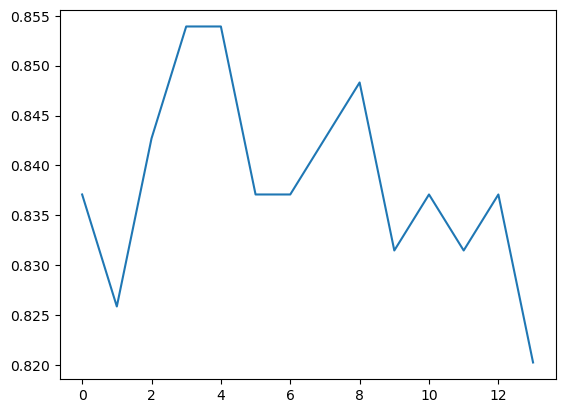

In [32]:
sb.lineplot(data=resultados)

In [33]:
modelo = DecisionTreeClassifier(max_depth=8)
modelo.fit(X_ent, y_ent)
predicciones = modelo.predict(X_pru)
exactitud = accuracy_score(y_pru, predicciones)

In [34]:
from sklearn.metrics import classification_report

print(classification_report(y_pru, predicciones))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88       111
           1       0.84      0.72      0.77        67

    accuracy                           0.84       178
   macro avg       0.84      0.82      0.83       178
weighted avg       0.84      0.84      0.84       178



In [35]:
from sklearn.metrics import confusion_matrix
pd.DataFrame(confusion_matrix(y_pru, predicciones), columns=["Pred: No", "Pred: Si"], index=["Real: No", "Real: Si"])

,Pred: No,Pred: Si
Real: No,102,9
Real: Si,19,48


In [36]:
X_ent.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q', 'S'], dtype='object')

[Text(0.4377422480620155, 0.9444444444444444, 'male <= 0.5\n0.473\n711\n[438, 273]\nMurió'),
 Text(0.24660852713178294, 0.8333333333333334, 'Pclass <= 2.5\n0.395\n244\n[66, 178]\nVivió'),
 Text(0.34217538759689925, 0.8888888888888888, 'True  '),
 Text(0.10077519379844961, 0.7222222222222222, 'Age <= 4.0\n0.091\n125\n[6, 119]\nVivió'),
 Text(0.08527131782945736, 0.6111111111111112, '0.0\n1\n[1, 0]\nMurió'),
 Text(0.11627906976744186, 0.6111111111111112, 'Fare <= 26.125\n0.077\n124\n[5, 119]\nVivió'),
 Text(0.10077519379844961, 0.5, 'Age <= 56.0\n0.21\n42\n[5, 37]\nVivió'),
 Text(0.08527131782945736, 0.3888888888888889, 'SibSp <= 0.5\n0.176\n41\n[4, 37]\nVivió'),
 Text(0.031007751937984496, 0.2777777777777778, 'Age <= 37.0\n0.071\n27\n[1, 26]\nVivió'),
 Text(0.015503875968992248, 0.16666666666666666, '0.0\n20\n[0, 20]\nVivió'),
 Text(0.046511627906976744, 0.16666666666666666, 'Age <= 39.0\n0.245\n7\n[1, 6]\nVivió'),
 Text(0.031007751937984496, 0.05555555555555555, '0.0\n1\n[1, 0]\nMurió'

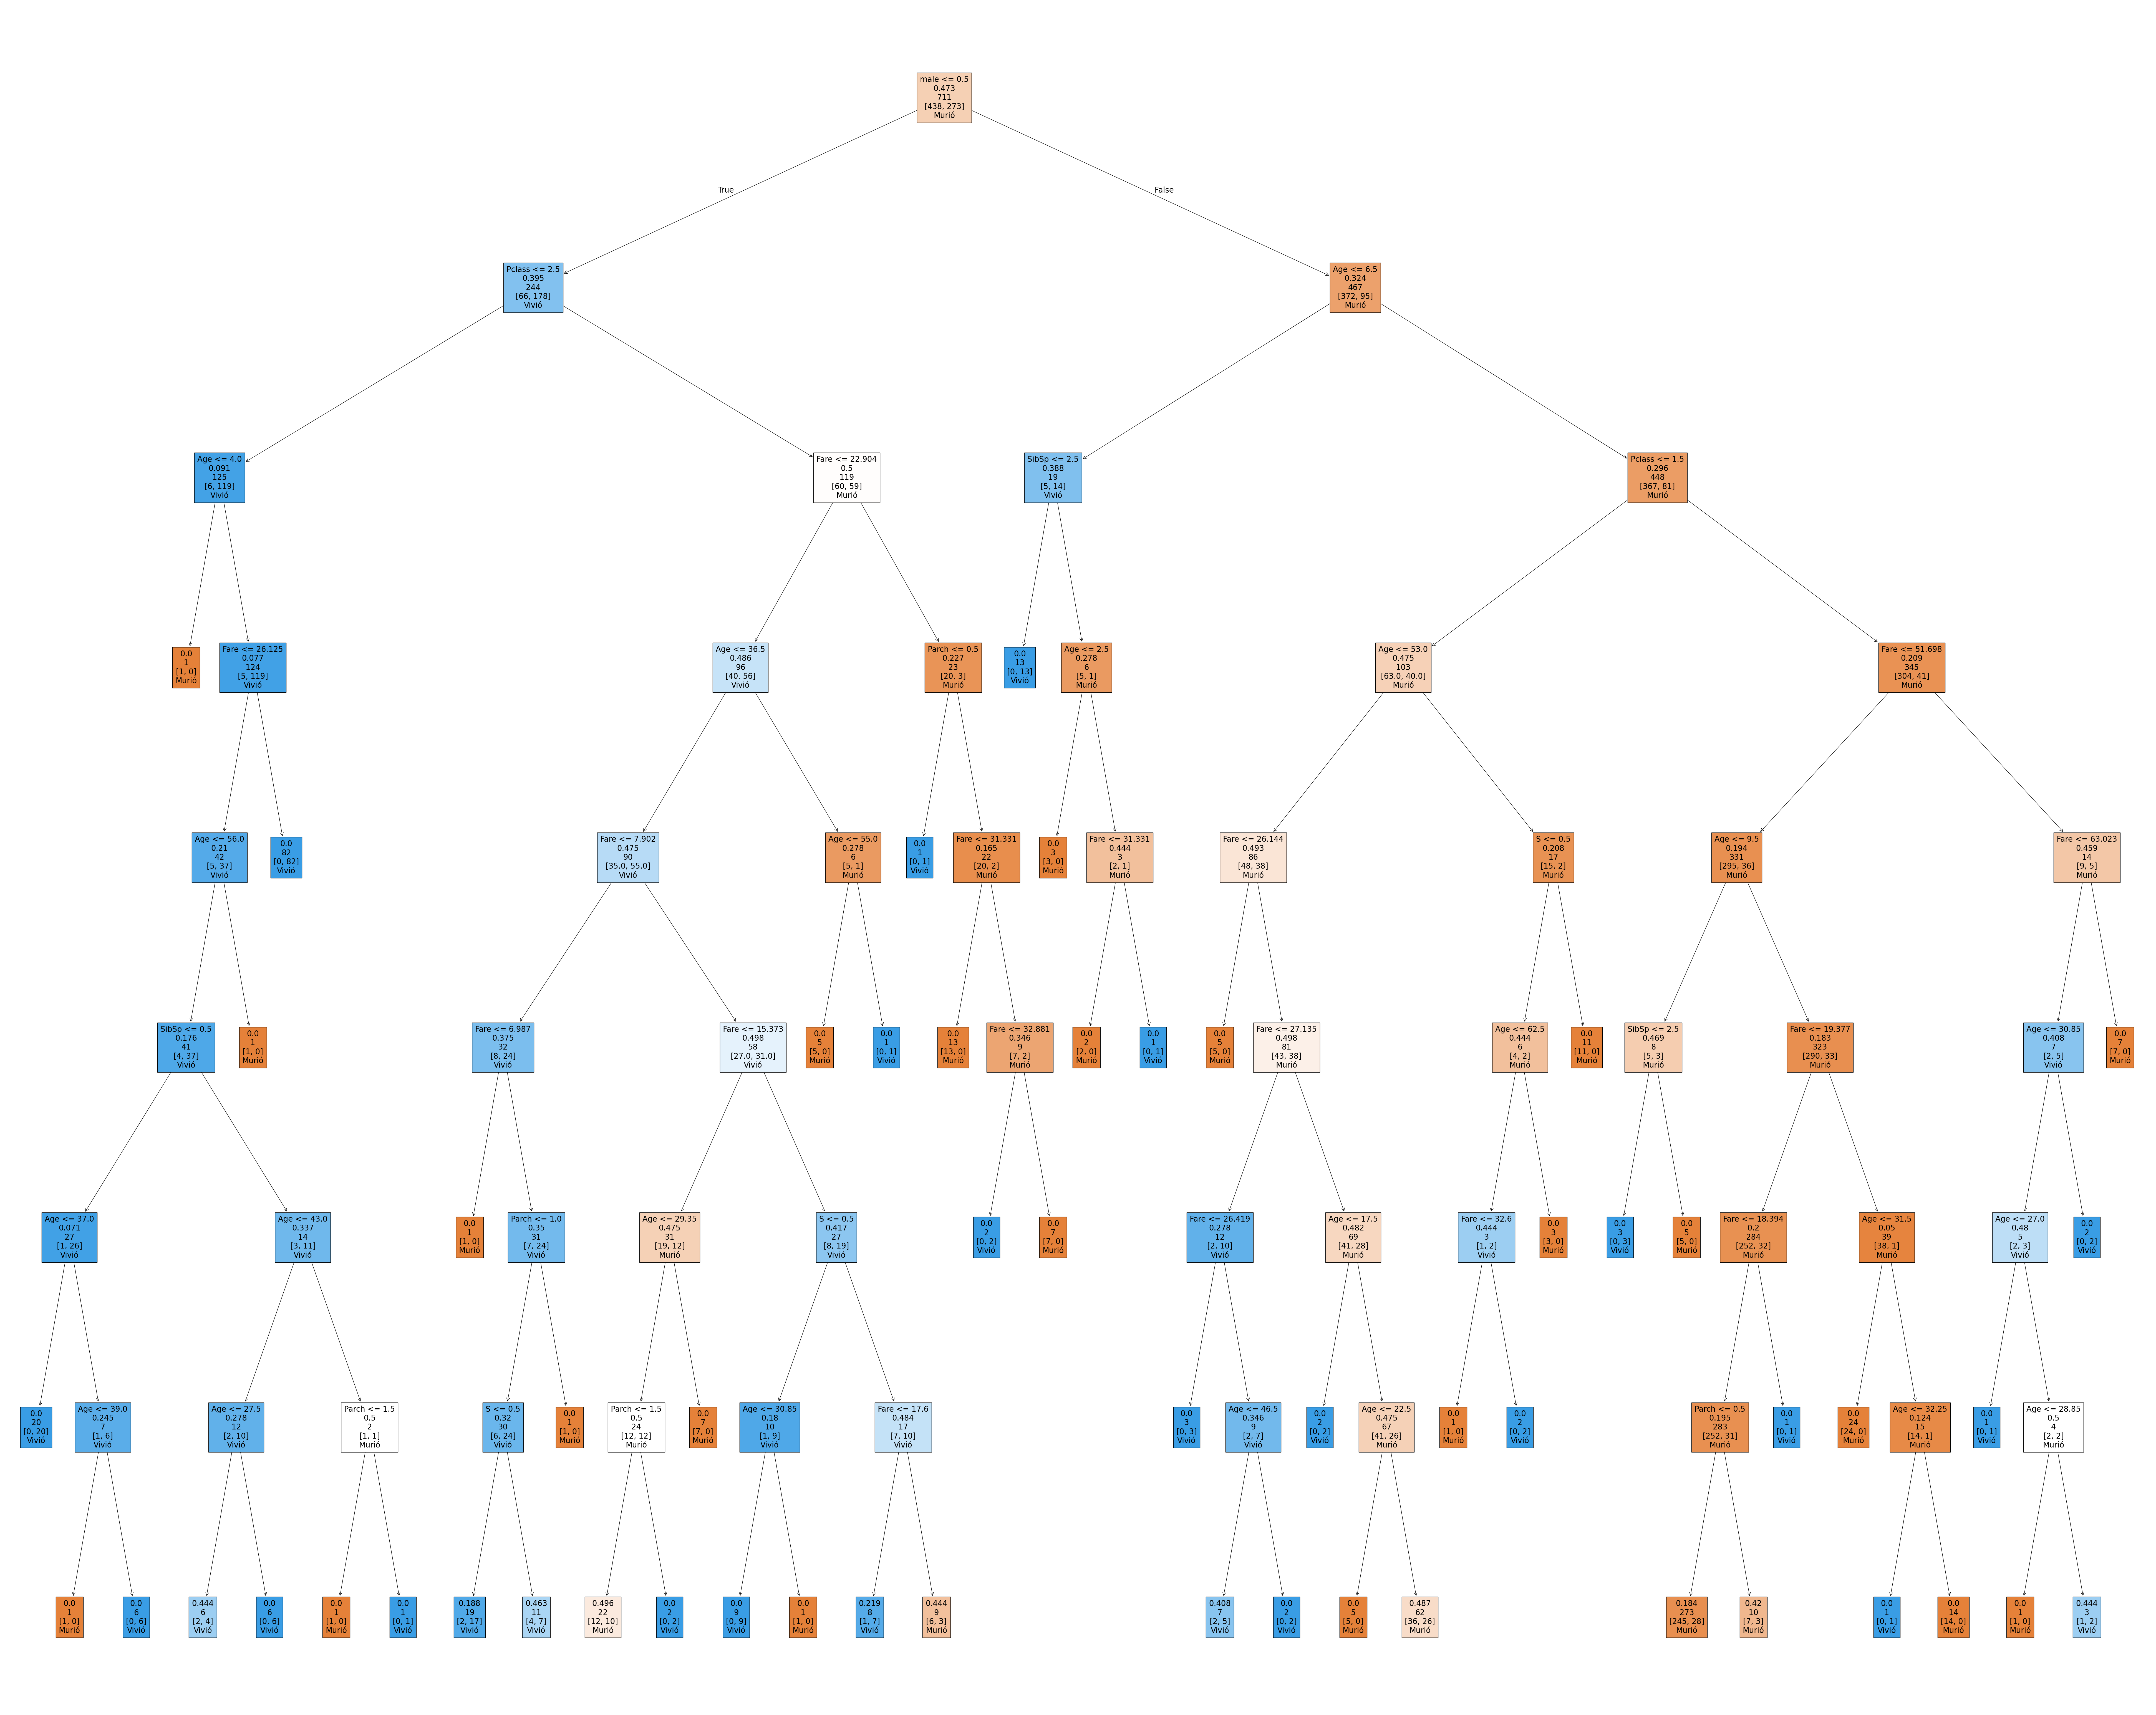

In [37]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(100, 80))
plot_tree(
    modelo,
    feature_names=X_ent.columns,
    class_names=["Murió", "Vivió"],
    filled=True, label="none"
)

In [38]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pru, predicciones)

0.8426966292134831

In [39]:
from sklearn.metrics import classification_report

print(classification_report(y_pru, predicciones))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88       111
           1       0.84      0.72      0.77        67

    accuracy                           0.84       178
   macro avg       0.84      0.82      0.83       178
weighted avg       0.84      0.84      0.84       178



In [40]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_pru, predicciones)

array([[102,   9],
       [ 19,  48]], dtype=int64)

In [41]:
pd.DataFrame(confusion_matrix(y_pru, predicciones), columns=["Pred: No", "Pred: Si"], index=["Real: No", "Real: Si"])

,Pred: No,Pred: Si
Real: No,102,9
Real: Si,19,48


In [42]:
X.head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,22.0,1,0,7.2500,True,False,True
1,1,38.0,1,0,71.2833,False,False,False
2,3,26.0,0,0,7.9250,False,False,True
3,1,35.0,1,0,53.1000,False,False,True
4,3,35.0,0,0,8.0500,True,False,True


In [43]:
nueva_persona = [2, 35, 0, 0, 80, 0, 0, 0]
prediccion = modelo.predict([nueva_persona])
if prediccion[0] == 1:
  print("Sobreviviste")
else:
  print("No sobreviviste")

Sobreviviste


c:\Users\ing_c\miniconda3\envs\ai-gpu\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
